- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [69]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [70]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
# modelos de aprendizado profundo
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM

In [72]:
# modelos de séries temporais
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [73]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np
from matplotlib import pyplot

In [74]:
# carregando arquivo clusterizado em dataframe
df_gold_trans = pd.read_csv('df_treated/df_gold_trans.csv')

In [75]:
# conferindo a dimensão do dataframe, linhas e colunas
df_gold_trans.shape

(1206, 41)

In [76]:
# ordenando pelo index o dataframe carregado
df_gold_trans = df_gold_trans.sort_index()

In [77]:
# reconhecendo as primeiras linhas do df
df_gold_trans.head(3)

,date,sp500 open,sp500 high,sp500 low,sp500 close,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq high-low,usd_chf,silver open,silver high,silver low,silver close,silver volume,oil high-low,gold open,gold high,gold low,gold close,standard__sp500 open,standard__sp500 high,standard__sp500 low,standard__sp500 close,standard__nasdaq open,standard__nasdaq high,standard__nasdaq low,standard__nasdaq close,standard__nasdaq high-low,standard__usd_chf,standard__silver open,standard__silver high,standard__silver low,standard__silver close,standard__silver volume,standard__oil high-low,standard__gold open,standard__gold high,standard__gold low,standard__gold close
0,2010-04-01,117.80,118.25,117.10,117.80,48.34,48.70,47.79,48.16,0.91,1.0559,17.89,17.95,17.79,17.84,96350.0,0.330,109.97,110.4700,109.92,110.26,-2.771243,-2.778349,-2.766272,-2.770555,-2.207742,-2.205655,-2.211944,-2.211372,-0.456933,2.393095,0.373972,0.355181,0.377596,0.355303,0.079335,0.090875,-1.500334,-1.489406,-1.448056,-1.457262
1,2010-04-05,118.25,118.84,117.92,118.76,48.26,48.72,48.14,48.61,0.58,1.0619,17.95,18.10,17.90,18.08,180524.0,0.670,110.56,110.9837,110.27,110.89,-2.759359,-2.762784,-2.744630,-2.745236,-2.210116,-2.205064,-2.201534,-2.198044,-1.072927,2.547151,0.401619,0.423798,0.428713,0.466116,2.020602,2.264872,-1.413354,-1.413944,-1.396188,-1.364412
2,2010-04-12,119.70,120.05,119.56,119.74,49.05,49.20,48.94,49.07,0.26,1.0598,18.38,18.46,18.11,18.12,102729.0,0.585,113.64,114.1300,112.98,113.01,-2.721067,-2.730861,-2.701346,-2.719390,-2.186671,-2.190875,-2.177741,-2.184421,-1.670255,2.493231,0.599753,0.588479,0.526299,0.484584,0.226451,1.721372,-0.959291,-0.951758,-0.994587,-1.051965


In [78]:
# verificando a posição de cada variável
df_gold_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1206 non-null   object 
 1   sp500 open                 1206 non-null   float64
 2   sp500 high                 1206 non-null   float64
 3   sp500 low                  1206 non-null   float64
 4   sp500 close                1206 non-null   float64
 5   nasdaq open                1206 non-null   float64
 6   nasdaq high                1206 non-null   float64
 7   nasdaq low                 1206 non-null   float64
 8   nasdaq close               1206 non-null   float64
 9   nasdaq high-low            1206 non-null   float64
 10  usd_chf                    1206 non-null   float64
 11  silver open                1206 non-null   float64
 12  silver high                1206 non-null   float64
 13  silver low                 1206 non-null   float

In [79]:
# separando variáveis independentes(x) e dependentes(y)
X = df_gold_trans[list(df_gold_trans.columns[21:40])]
y = df_gold_trans[['standard__gold close']]

In [80]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   standard__sp500 open       1206 non-null   float64
 1   standard__sp500 high       1206 non-null   float64
 2   standard__sp500 low        1206 non-null   float64
 3   standard__sp500 close      1206 non-null   float64
 4   standard__nasdaq open      1206 non-null   float64
 5   standard__nasdaq high      1206 non-null   float64
 6   standard__nasdaq low       1206 non-null   float64
 7   standard__nasdaq close     1206 non-null   float64
 8   standard__nasdaq high-low  1206 non-null   float64
 9   standard__usd_chf          1206 non-null   float64
 10  standard__silver open      1206 non-null   float64
 11  standard__silver high      1206 non-null   float64
 12  standard__silver low       1206 non-null   float64
 13  standard__silver close     1206 non-null   float

In [81]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [82]:
# hiperparâmetros do CV
num_folds = 10
scoring = 'neg_mean_squared_error'

In [83]:
# implementando os modelos de ML
models = []

In [84]:
# preparando conjunto de dados para modelos ARIMA
# deixando variáveis correlacionadas como variáveis exógenas

X_train_ARIMA = X_train.loc[:, list(X.columns)]
X_test_ARIMA = X_test.loc[:, list(X.columns)]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)

In [85]:
# treinando o modelo ARIMA
import statsmodels.api as sm

model_arima = sm.tsa.arima.ARIMA(endog= Y_train, exog= X_train_ARIMA, order=[1,0,0])
ARIMAModel = model_arima.fit()

error_training_ARIMA = mean_squared_error(Y_train, ARIMAModel.fittedvalues)
predicated = ARIMAModel.predict(start= tr_len -1, end= to_len -1, exog= X_test_ARIMA)[1:]
error_test_ARIMA = mean_squared_error(Y_test, predicated)

In [86]:
print('error_training_ARIMA', error_training_ARIMA)
print('error_test_ARIMA', error_test_ARIMA)
#print('predicated', predicated.head(5))

error_training_ARIMA 0.0008726845450003024
error_test_ARIMA 0.0007898411540119807


In [87]:
# treinando o modelo LST
seq_len = 2 #Comprimento da seq para o LSTM 
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1])) 
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1])) 
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :] 
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [88]:
# LSTM Network 
def create_LSTMmodel(learn_rate = 0.01, momentum=0.0): 
    # criação do modelo 
    model = Sequential() 
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]))) 

    #Mais células podem ser acrescentadas, se necessário 
    model.add(Dense(1))
    optimizer = SGD(momentum=momentum) 
    #optimizer = SGD(lr=learn_rate, momentum=momentum) 
    model.compile(loss='mse', optimizer='adam') 
    return model 

In [89]:
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0.0) 
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,  
                    validation_data=(X_test_LSTM, Y_test_LSTM),
                    epochs=330, batch_size=72, verbose=0, shuffle=False)

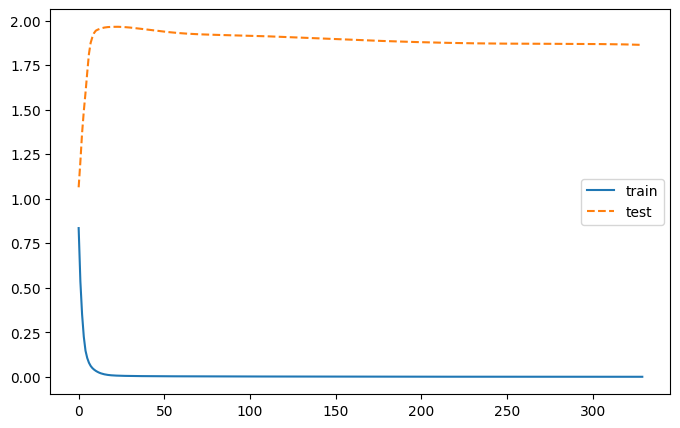

In [90]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', ) 
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',) 
pyplot.legend() 
pyplot.show()

In [91]:
error_training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM)) 
predicted = LSTMModel.predict(X_test_LSTM) 
error_test_LSTM = mean_squared_error(Y_test,predicted)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [92]:
test_results = []
train_results = []
test_results.append(error_test_ARIMA) 
test_results.append(error_test_LSTM) 
train_results.append(error_training_ARIMA) 
train_results.append(error_training_LSTM)

In [93]:
names = []
names.append('ARIMA') 
names.append('LSTM')

In [94]:
from statsmodels.tsa.arima.model import ARIMA

xx=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=(0,0,0)) 
model_fit = xx.fit()

In [95]:
def evaluate_arima_model(arima_order):
    #previsto = list() 
    global model_fit

    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order) 
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues) 

    return error     

In [96]:
# avaliar combinações dos valores de p, d e q para um modelo ARIMA 
def evaluate_models(p_values, d_values, q_values): 

    best_score, best_cfg = float('inf'), None 
    for p in p_values: 
        for d in d_values: 
            for q in q_values: 
                order = (p,d,q) 
                try:                   
                    mse = evaluate_arima_model(order) 
                    if mse < best_score: 
                        best_score, best_cfg = mse, order 
                    print('ARIMA%s MSE=%.7f' % (order,mse)) 
                except: 
                    continue 
            print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score)) 

In [97]:
# avaliação de parâmetros 
p_values = [0, 1, 2] 
d_values = range(0, 2) 
q_values = range(0, 2) 

warnings.filterwarnings('ignore')
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.0008727
ARIMA(0, 0, 1) MSE=0.0008727
Best ARIMA(0, 0, 1) MSE=0.0008727
ARIMA(0, 1, 0) MSE=0.0017488
ARIMA(0, 1, 1) MSE=0.0009276
Best ARIMA(0, 0, 1) MSE=0.0008727
ARIMA(1, 0, 0) MSE=0.0008727
ARIMA(1, 0, 1) MSE=0.0008724
Best ARIMA(1, 0, 1) MSE=0.0008724
ARIMA(1, 1, 0) MSE=0.0013459
ARIMA(1, 1, 1) MSE=0.0009509
Best ARIMA(1, 0, 1) MSE=0.0008724
ARIMA(2, 0, 0) MSE=0.0008713
ARIMA(2, 0, 1) MSE=0.0008712
Best ARIMA(2, 0, 1) MSE=0.0008712
ARIMA(2, 1, 0) MSE=0.0011814
ARIMA(2, 1, 1) MSE=0.0009523
Best ARIMA(2, 0, 1) MSE=0.0008712


In [98]:
# preparação do modelo

from statsmodels.tsa.arima.model import ARIMA

modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1]) 
model_fit_tuned = modelARIMA_tuned.fit() 

In [99]:
# estimar a acurácia no conjunto de validação 
predicted_tuned = model_fit.predict(start = tr_len -1 , end = to_len -1, exog = X_test_ARIMA)[1:] 
print(mean_squared_error(Y_test,predicted_tuned))

0.0009032218506547443


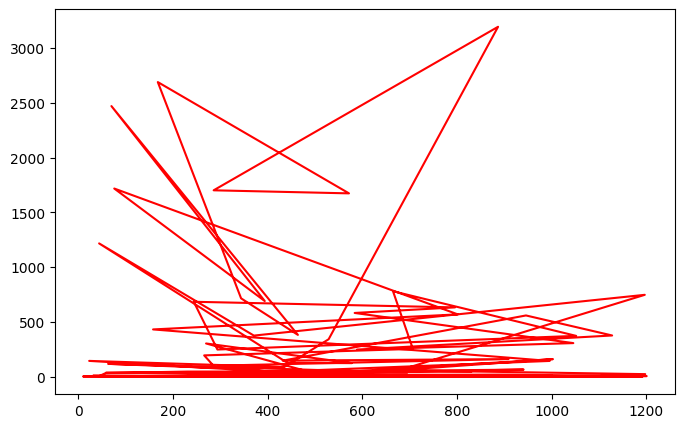

In [100]:
# plotar os dados reais comparados com os previstos 
predicted_tuned.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',) 

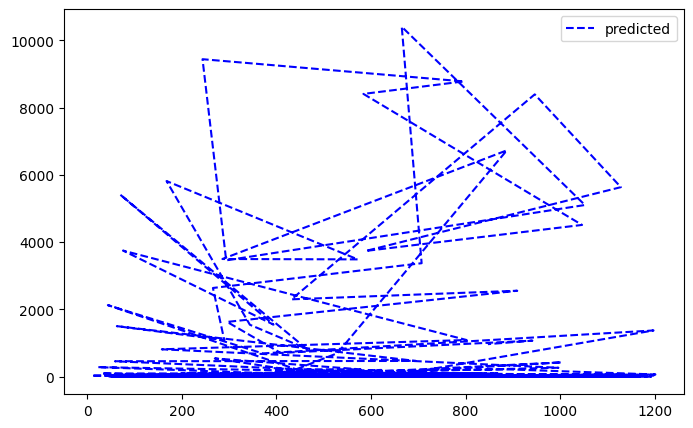

In [101]:
# plotar t e a de forma separada 
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted') 
pyplot.legend() 
pyplot.rcParams['figure.figsize'] = (8,5) 
pyplot.show()